In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.head())
print(test.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
X_train=train.drop(['label'],axis=1)
y_train=train['label']

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

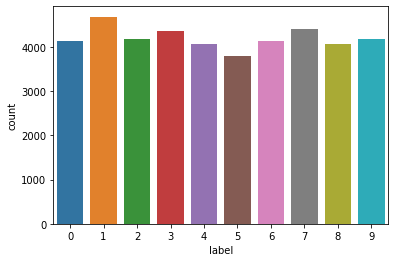

In [4]:
import seaborn as sns
g = sns.countplot(y_train)
y_train.value_counts()

In [5]:
X_train=X_train/255.0
test=test/255.0

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [7]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_dev,y_train,y_dev=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [9]:
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
X_train[0][:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train[0][:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

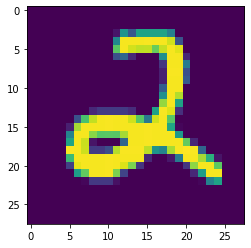

In [12]:
g = plt.imshow(X_train[0][:,:,0])

In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Convolution2D
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', kernel_initializer='he_normal', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', kernel_initializer='he_normal', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 64, kernel_size = (5,5), kernel_initializer='he_normal',padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), kernel_initializer='he_normal', padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))


In [16]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, zoom_range = 0.15,width_shift_range=0.15,height_shift_range=0.15)
datagen.fit(X_train)

In [18]:
print(X_train.shape)
print(X_dev.shape)
print(y_train.shape)
print(y_dev.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


In [19]:
history=model.fit(X_train, y_train,epochs=5, validation_data = (X_dev, y_dev), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 480s 13ms/sample - loss: 0.7843 - accuracy: 0.7054 - val_loss: 0.0874 - val_accuracy: 0.9750
Epoch 2/5
37800/37800 [==============================] - 399s 11ms/sample - loss: 0.3578 - accuracy: 0.8700 - val_loss: 0.0727 - val_accuracy: 0.9833
Epoch 3/5
37800/37800 [==============================] - 357s 9ms/sample - loss: 0.3321 - accuracy: 0.8845 - val_loss: 0.0894 - val_accuracy: 0.9783
Epoch 4/5
37800/37800 [==============================] - 361s 10ms/sample - loss: 0.3133 - accuracy: 0.8946 - val_loss: 0.0617 - val_accuracy: 0.9833
Epoch 5/5
37800/37800 [==============================] - 350s 9ms/sample - loss: 0.3231 - accuracy: 0.8985 - val_loss: 0.0710 - val_accuracy: 0.9810


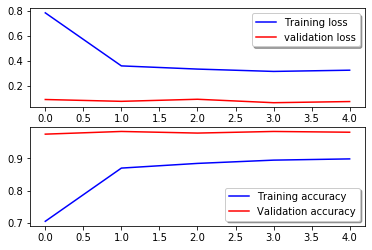

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

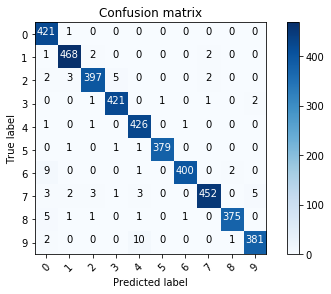

In [21]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_dev)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_dev,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [22]:
results = model.predict(test)
print(results)


[[1.5621512e-22 8.3848782e-15 9.9999940e-01 ... 4.9809046e-07
  6.0430303e-08 3.9000500e-20]
 [9.9964857e-01 8.8683963e-05 4.5860534e-06 ... 3.8113150e-05
  1.2420376e-06 5.1458979e-08]
 [1.2039262e-21 1.8163006e-27 1.6976464e-21 ... 1.0419270e-10
  7.3972245e-05 9.9992597e-01]
 ...
 [0.0000000e+00 2.3392541e-35 7.7559305e-31 ... 3.8255000e-32
  1.5793839e-23 1.0584543e-28]
 [2.5993101e-09 1.1739014e-11 1.1402599e-09 ... 1.3100635e-04
  7.3445630e-03 9.9157566e-01]
 [1.8112345e-32 3.3149970e-21 1.0000000e+00 ... 9.2203706e-10
  4.1923288e-11 5.6180207e-29]]


'results = np.argmax(results,axis = 1)\nresults = pd.Series(results,name="Label")\nsubmission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)\nprint(submission)\nsubmission.to_csv("cnn_mnist_datagen.csv",index=False)'

In [24]:
flag=0
prediction=[]
for i in results:
    for j in range(len(i)):
        if i[j]>=0.5:
            prediction.append(j)
            flag=1
    if(flag==0):
        prediction.append(-99)
        
    
    

In [25]:
print(prediction)

[2, 0, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 7, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 3, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 0, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 3, 0, 9, 0, 